In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
fname = "Batting.csv"
df = pd.read_csv(fname)

In [5]:
df[-20:]


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
107409,yacabji01,2019,1,BAL,AL,29,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107410,yamamjo01,2019,1,MIA,NL,16,21,0,1,0,...,1.0,0.0,0.0,1,9.0,0.0,0.0,4.0,0.0,1.0
107411,yarbrry01,2019,1,TBA,AL,28,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107412,yardler01,2019,1,SDN,NL,10,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107413,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,55.0,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0
107414,yateski01,2019,1,SDN,NL,60,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107415,yelicch01,2019,1,MIL,NL,130,489,100,161,29,...,97.0,30.0,2.0,80,118.0,16.0,8.0,0.0,3.0,8.0
107416,ynoaga01,2019,1,BAL,AL,36,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107417,ynoahu01,2019,1,ATL,NL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107418,youngal01,2019,1,ARI,NL,17,25,1,1,0,...,0.0,0.0,0.0,0,18.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[df["yearID"] == 1871]['AB'].median()

118.0

In [7]:
df[df["yearID"] == 2015]['AB'].median()

12.0

In [8]:
df[df["yearID"] == 2015]['AB'].count()

1486

In [9]:
df[(df["yearID"] == 2015) & (df["AB"] > 240) ]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
99865,abreujo02,2015,1,CHA,AL,154,613,88,178,34,...,101.0,0.0,0.0,39,140.0,11.0,15.0,0.0,1.0,16.0
99876,ahmedni01,2015,1,ARI,NL,134,421,49,95,17,...,34.0,4.0,5.0,29,81.0,1.0,1.0,5.0,3.0,4.0
99887,alonsyo01,2015,1,SDN,NL,103,354,50,100,18,...,31.0,2.0,5.0,42,48.0,3.0,3.0,0.0,3.0,13.0
99889,altuvjo01,2015,1,HOU,AL,154,638,86,200,40,...,66.0,38.0,13.0,33,67.0,8.0,9.0,3.0,6.0,17.0
99894,alvarpe01,2015,1,PIT,NL,150,437,60,106,18,...,77.0,2.0,0.0,48,131.0,9.0,2.0,0.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101322,wongko01,2015,1,SLN,NL,150,557,71,146,28,...,61.0,15.0,8.0,36,95.0,2.0,15.0,0.0,5.0,10.0
101334,yelicch01,2015,1,MIA,NL,126,476,63,143,30,...,44.0,16.0,5.0,47,101.0,2.0,2.0,0.0,0.0,13.0
101337,youngch04,2015,1,NYA,AL,140,318,53,80,20,...,42.0,3.0,1.0,30,73.0,2.0,3.0,3.0,2.0,6.0
101343,zimmery01,2015,1,WAS,NL,95,346,43,86,25,...,73.0,1.0,0.0,33,79.0,0.0,1.0,0.0,10.0,13.0


In [10]:
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [12]:
cols2keep  = ['AB', 'R', 'H','2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO']
newdf = df[(df["yearID"] > 2010) & (df["AB"] > 240) ]
newdf = newdf[cols2keep]

In [13]:
newdf[:6]

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO
94223,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0
94227,333,39,91,16,7,6,36.0,6.0,0.0,40,79.0
94249,457,63,120,22,0,5,36.0,13.0,3.0,41,83.0
94250,587,96,164,27,3,5,60.0,37.0,12.0,56,74.0
94252,380,46,91,20,0,9,37.0,10.0,3.0,29,96.0
94253,443,47,97,20,4,23,78.0,1.0,1.0,36,133.0


In [14]:
newdf['PA'] = newdf['AB']+newdf['BB']

In [15]:
newdf[:12]

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,PA
94223,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,580
94227,333,39,91,16,7,6,36.0,6.0,0.0,40,79.0,373
94249,457,63,120,22,0,5,36.0,13.0,3.0,41,83.0,498
94250,587,96,164,27,3,5,60.0,37.0,12.0,56,74.0,643
94252,380,46,91,20,0,9,37.0,10.0,3.0,29,96.0,409
94253,443,47,97,20,4,23,78.0,1.0,1.0,36,133.0,479
94261,464,63,137,33,4,19,82.0,3.0,1.0,73,131.0,537
94267,556,71,155,33,8,10,59.0,30.0,6.0,31,68.0,587
94277,305,29,70,13,0,16,47.0,0.0,0.0,22,71.0,327
94280,446,47,109,27,0,12,39.0,3.0,1.0,38,88.0,484


In [16]:
statlist = ['R','H','2B','3B','HR', 'BB','SB']


for stat in statlist:
    print(stat+'perPA')
    newdf[stat+'perPA'] = newdf[stat]/newdf['PA']

RperPA
HperPA
2BperPA
3BperPA
HRperPA
BBperPA
SBperPA


In [17]:
newdf["RperPA"].mean()

0.12174585797442794

In [18]:
newdf["RperPA"].max()

0.2146422628951747

In [19]:
newdf[newdf["RperPA"]>0.20]

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,PA,RperPA,HperPA,2BperPA,3BperPA,HRperPA,BBperPA,SBperPA
94700,583,136,153,26,10,41,119.0,25.0,10.0,85,169.0,668,0.203593,0.229042,0.038922,0.014970,0.061377,0.127246,0.037425
96905,559,129,182,27,8,30,83.0,49.0,5.0,67,139.0,626,0.206070,0.290735,0.043131,0.012780,0.047923,0.107029,0.078275
104453,520,129,180,47,5,32,80.0,30.0,6.0,81,91.0,601,0.214642,0.299501,0.078203,0.008319,0.053245,0.134775,0.049917


In [20]:
df[104453:104454]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
104453,bettsmo01,2018,1,BOS,AL,136,520,129,180,47,...,80.0,30.0,6.0,81,91.0,8.0,8.0,0.0,5.0,5.0


In [21]:
df[94700:94701]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
94700,grandcu01,2011,1,NYA,AL,156,583,136,153,26,...,119.0,25.0,10.0,85,169.0,0.0,12.0,4.0,7.0,12.0


In [22]:
df[96905:96906]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
96905,troutmi01,2012,1,LAA,AL,139,559,129,182,27,...,83.0,49.0,5.0,67,139.0,4.0,6.0,0.0,7.0,7.0


In [23]:
newdf.shape[0], newdf.dropna().shape[0]

(2594, 2594)

In [24]:
# RperPA, HperPA, 2BperPA, 3BperPA, HRperPA, SBperPA
features = ['HperPA','2BperPA','3BperPA','HRperPA', 'BBperPA','SBperPA']
x = newdf.loc[:, features].values

In [25]:
x

array([[0.21896552, 0.05172414, 0.00172414, 0.0137931 , 0.13448276,
        0.0362069 ],
       [0.24396783, 0.04289544, 0.01876676, 0.01608579, 0.10723861,
        0.01608579],
       [0.24096386, 0.04417671, 0.        , 0.01004016, 0.08232932,
        0.02610442],
       ...,
       [0.25062035, 0.05459057, 0.00744417, 0.05210918, 0.07940447,
        0.00496278],
       [0.28295255, 0.05096661, 0.00527241, 0.07732865, 0.14059754,
        0.05272408],
       [0.15384615, 0.03496503, 0.0034965 , 0.03146853, 0.06993007,
        0.        ]])

In [26]:
y = newdf.loc[:,['RperPA']].values
dfy = pd.DataFrame(y); dfy.columns = ["RperPA"]


In [27]:
#x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,HperPA,2BperPA,3BperPA,HRperPA,BBperPA,SBperPA
0,0.218966,0.051724,0.001724,0.013793,0.134483,0.036207
1,0.243968,0.042895,0.018767,0.016086,0.107239,0.016086
2,0.240964,0.044177,0.000000,0.010040,0.082329,0.026104
3,0.255054,0.041991,0.004666,0.007776,0.087092,0.057543
4,0.222494,0.048900,0.000000,0.022005,0.070905,0.024450


In [28]:
pca = PCA(n_components=1)

In [29]:
principalComponents = pca.fit_transform(x)

In [30]:
pca.components_

array([[-0.63069707, -0.08681498, -0.03519041,  0.14357564,  0.74480064,
        -0.13455126]])

score = -0.630*HperPA + -0.08681*2BperPA+...

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.components_

array([[-0.63069707, -0.08681498, -0.03519041,  0.14357564,  0.74480064,
        -0.13455126],
       [ 0.73836535,  0.19714164, -0.00082274,  0.23152477,  0.60188155,
        -0.0092729 ]])

In [32]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dfy['RperPA'] ], axis = 1)
finalDf[:6]

,principal component 1,principal component 2,RperPA
0,0.045117,0.011568,0.093103
1,0.012260,0.012594,0.104558
2,-0.006065,-0.005841,0.126506
3,-0.015934,0.006178,0.149300
4,-0.001395,-0.022639,0.112469
5,0.021449,-0.030024,0.098121


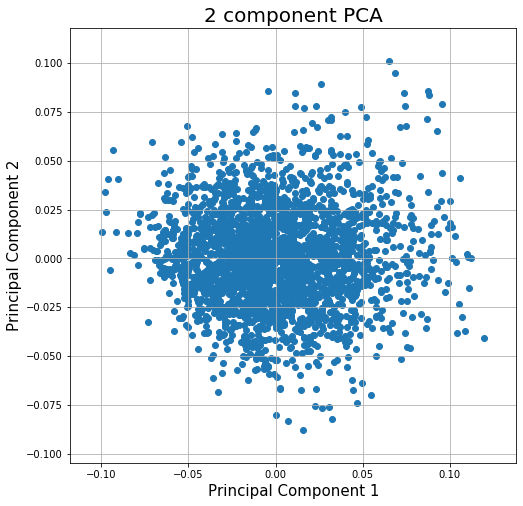

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)



ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'])
#ax.legend(targets)
ax.grid()

In [34]:
#colors = ['r', 'g', 'b']


# a range of blues 
#(204,229,255), (153,204,255), (102,178,255), (51,153,255)
# (0,128,255),(0,102,204),(0,76,153),(0,51,102),(0,25,51)


numDivisions = 8

aRange = np.linspace(y.min(),y.max(),numDivisions+1)

finalDf['Rness'] = 0

for aNum in range(numDivisions):
    finalDf.loc[finalDf["RperPA"]> aRange[aNum+1],'Rness']= aNum+1
    

In [35]:
finalDf[:6]

,principal component 1,principal component 2,RperPA,Rness
0,0.045117,0.011568,0.093103,2
1,0.012260,0.012594,0.104558,2
2,-0.006065,-0.005841,0.126506,3
3,-0.015934,0.006178,0.149300,4
4,-0.001395,-0.022639,0.112469,3
5,0.021449,-0.030024,0.098121,2


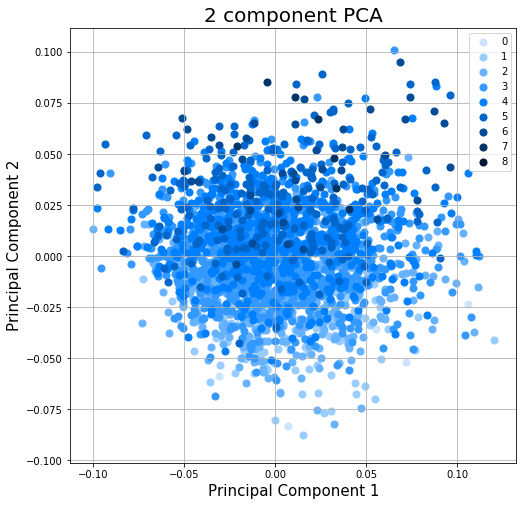

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [0,1,2,3,4,5,6,7,8]
colors = [(204,229,255), (153,204,255), (102,178,255), (51,153,255),
 (0,128,255),(0,102,204),(0,76,153),(0,51,102),(0,25,51)]

colors = [np.array(color)/255 for color in colors]
colors = [ [list(color)] for color in colors]

#colors = ['lightgray', 'silver', 'darkgray', 'gray','dimgray','black']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rness'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()